# Convolutional neural networks

In class, we have briefly reviewed the idea of learning good features directly from data and went through the concept of convolutional neural networks along with few architectures.

Until recently, building convolutional neural networks was tough. There was no high-level tools for that, you would be required to understand all the internal mechanics of the model and its operations.

Today, due to the high-level tools such as Keras and TensorFlow, everybody can build a convolutional neural network and put it to work without diving deep into them. What used to be a one-month project became a few hours exercise.


In [2]:
import pickle
import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import tensorflow as tf
import keras
from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/Users/sofiapetryshyn/opt/anaconda3/envs/ml2_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sofiapetryshyn/opt/anaconda3/envs/ml2_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sofiapetryshyn/opt/anaconda3/envs/ml2_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

## Loading the images

In [3]:
train_images, train_labels = pickle.load(open('data/train_set_all.pkl', 'rb'))
cv_images, cv_labels = pickle.load(open('data/test_set_all.pkl', 'rb'))

In [4]:
print(train_images.shape)
print(len(train_labels))

(50000, 32, 32, 3)
50000


In [5]:
print(cv_images.shape)
print(len(cv_labels))

(10000, 32, 32, 3)
10000


In [6]:
print(train_labels[0:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [7]:
def show_image(np_array):
    %matplotlib inline
    plt.figure()
    plt.imshow(np_array)

In [137]:
class_names = {
    3: 'cat',
    8: 'ship',
    6: 'frog',
    1: 'car',
    9: 'truck',
    5: 'dog',
    7: 'horse',
    4: 'deer',
    2: 'bird',
    0: 'plane'
}

def show_example(data_set, labels, example_index):
    show_image(data_set[example_index])
    print('Label: ', class_names[np.argmax(labels[example_index])])

Label:  frog


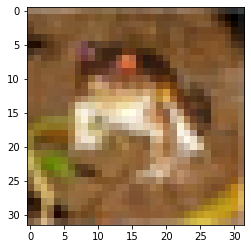

In [132]:
show_example(train_images, train_labels, example_index = 0);

Label:  cat


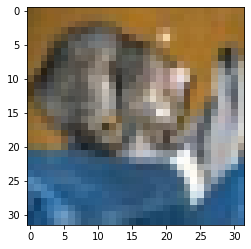

In [133]:
show_example(cv_images, cv_labels, example_index = 0);

Label:  cat


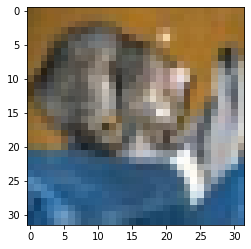

Label:  ship


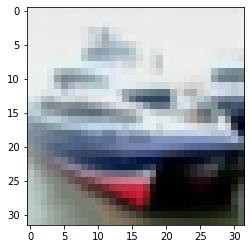

Label:  ship


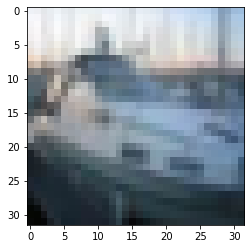

Label:  plane


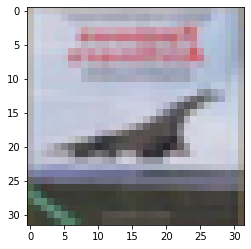

Label:  frog


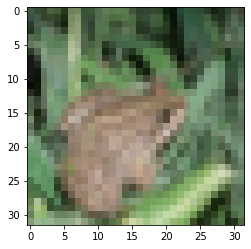

Label:  frog


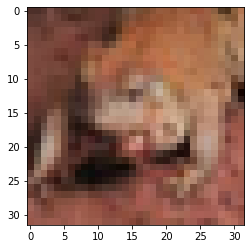

Label:  car


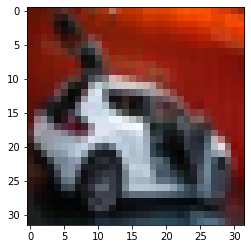

Label:  cat


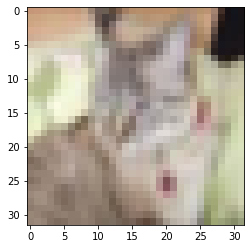

Label:  car


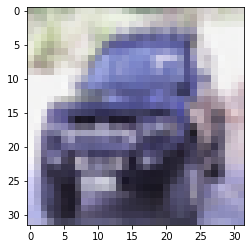

Label:  plane


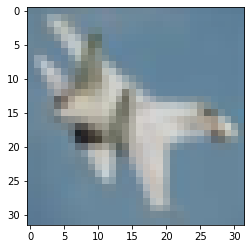

Label:  truck


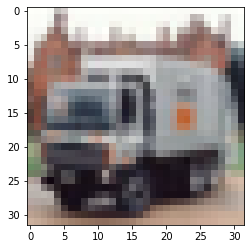

Label:  dog


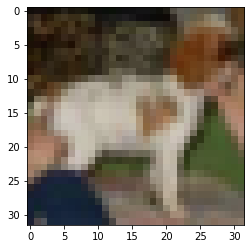

Label:  horse


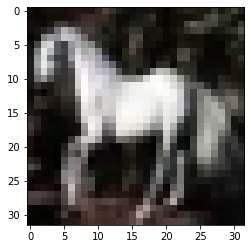

Label:  truck


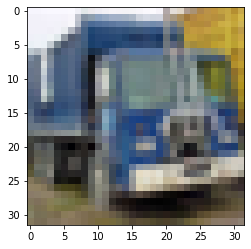

Label:  dog


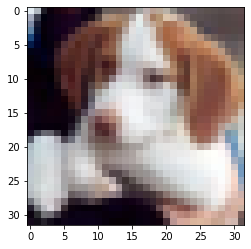

Label:  horse


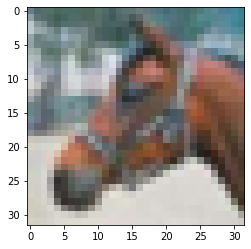

Label:  deer


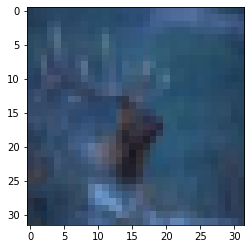

Label:  bird


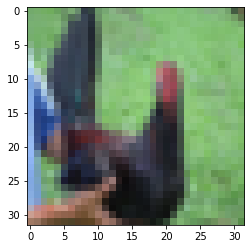

Label:  deer


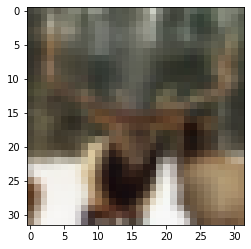

Label:  bird


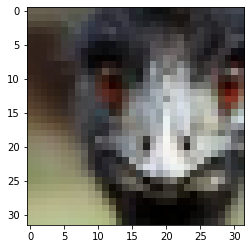

In [138]:
arr = [i for i in range(10)]
arr2 = [i for i in range(10)]
arr += arr2
for i in range(len(cv_labels)):
    lab = np.argmax(cv_labels[i])
    if lab in arr:
        show_example(cv_images, cv_labels, example_index = i);
        plt.show()
        arr.remove(lab)
    if not arr:
        break

In [135]:
cv_labels[i]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

## Preprocessing the data

In [11]:
train_labels=np.int_(to_categorical(train_labels))
cv_labels=np.int_(to_categorical(cv_labels))

print(train_images.shape, train_labels.shape)
print(cv_images.shape, cv_labels.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [12]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

In [13]:
train_generator.fit(train_images)
val_generator.fit(cv_images)

## Building AlexNet

In 2012 a convolutional neural network called AlexNet won ImageNet competition. 

Go through an [original AlexNet paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) to investigate the architecture. Next, investigate the [basics of Keras](https://keras.io/#keras-the-python-deep-learning-library). We will use it with TensorFlow backend.

You are also encouraged to go through some CNN tutorial for Keras. There is a number of them online (for example, [this](https://elitedatascience.com/keras-tutorial-deep-learning-in-python) or [this](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)).
Now, build AlexNex network with Keras for object recognition. Note that standard AlexNet works with 224x224 input images. The dataset you are going to use for this problem is 32x32.

In [15]:
AlexNet = Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same'),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same'),
    
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

AlexNet.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 96)          34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 96)          384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 96)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 384)       

## Training AlexNet

Use training set for training the network to recognize objects. You might want to use RMSProp optimizer to speed up the training.

Convolutional networks require a lot of computing power for training. Typical setup for training CNN is to use GPU, however, in this problem you are not required to do so. CPU will be fine as well.

If you are using CPU for this subproblem, training process might be slow. You can stop it manually as soon as you get meaningful results.

Report the results on the training and cross-validation sets. The report should contain the training logs.

In [17]:
checkpointer = keras.callbacks.ModelCheckpoint('AlexNet2.h5', verbose=1, save_best_only=False)

callbacks = [
    checkpointer,
#     keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    keras.callbacks.TensorBoard(log_dir='logs')
]

AlexNet.compile(optimizer='RMSprop', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

batch_size=100

results = AlexNet.fit(
    train_generator.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=val_generator.flow(cv_images, cv_labels, batch_size=batch_size),
    validation_steps = 250,
    epochs=50,
    steps_per_epoch = train_images.shape[0]//batch_size,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
500/500 [==============================] - 204s 408ms/step - loss: 1.3949 - accuracy: 0.5198 - val_loss: 1.3200 - val_accuracy: 0.4729

Epoch 00001: saving model to AlexNet.h5
Epoch 2/50
500/500 [==============================] - 203s 406ms/step - loss: 1.3197 - accuracy: 0.5479 - val_loss: 1.3945 - val_accuracy: 0.4723

Epoch 00002: saving model to AlexNet.h5
Epoch 3/50
500/500 [==============================] - 210s 419ms/step - loss: 1.2716 - accuracy: 0.5674 - val_loss: 1.5298 - val_accuracy: 0.5398

Epoch 00003: saving model to AlexNet.h5
Epoch 4/50
500/500 [==============================] - 204s 407ms/step - loss: 1.2403 - accuracy: 0.5806 - val_loss: 1.5401 - val_accuracy: 0.4911

Epoch 00004: saving model to AlexNet.h5
Epoch 5/50
500/500 [==============================] - 204s 408ms/step - loss: 1.1847 - accuracy: 0.6005 - val_loss: 1.7524 - val_accuracy: 0.4611

Epoch 00005: saving model to AlexNet.h5
Epoch 6/50
500/500 [==============================] - 207s 414ms/


Epoch 00044: saving model to AlexNet.h5
Epoch 45/50
500/500 [==============================] - 203s 407ms/step - loss: 0.5883 - accuracy: 0.8247 - val_loss: 2.5499 - val_accuracy: 0.5816

Epoch 00045: saving model to AlexNet.h5
Epoch 46/50
500/500 [==============================] - 200s 401ms/step - loss: 0.5723 - accuracy: 0.8260 - val_loss: 1.2322 - val_accuracy: 0.6512

Epoch 00046: saving model to AlexNet.h5
Epoch 47/50
500/500 [==============================] - 203s 405ms/step - loss: 0.5726 - accuracy: 0.8300 - val_loss: 1.3047 - val_accuracy: 0.6425

Epoch 00047: saving model to AlexNet.h5
Epoch 48/50
500/500 [==============================] - 204s 407ms/step - loss: 0.5571 - accuracy: 0.8331 - val_loss: 1.3016 - val_accuracy: 0.6295

Epoch 00048: saving model to AlexNet.h5
Epoch 49/50
500/500 [==============================] - 198s 395ms/step - loss: 0.5577 - accuracy: 0.8330 - val_loss: 1.9643 - val_accuracy: 0.6456

Epoch 00049: saving model to AlexNet.h5
Epoch 50/50
500/500

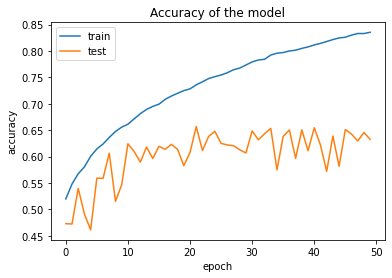

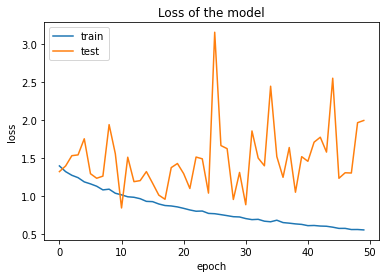

In [22]:
results.history.keys()
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
%load_ext tensorboard
%tensorboard --logdir logs

#### Conclusion:
What we want to gain the increase in accuracy function and decrease in loss function. As the loss increases, the accuracy decreases.\
From the plots abov, we can see that the model overfits, because `loss` and `acc` shows perfect function results, whereas `val_loss` and `val_acc` are very unstable. Only with smoothing = 0.99, we can see the tragectory of `val_loss` - it decreases, but this result doesn't satisfy us.\
We know that the model actually stoped oing generalization and started to memorize the data.

## Improving AlexNet

Here we will normalize the tensors of the image and 

In [21]:
AlexNet2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(32,32,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    
    tf.keras.layers.Conv2D(filters=20, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    
    tf.keras.layers.Conv2D(filters=20, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

AlexNet2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
average_pooling2d_3 (Average (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 20)        8020      
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 20)        80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 20)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 20)         

In [22]:
checkpointer2 = tf.keras.callbacks.ModelCheckpoint('AlexNetImprove.h5', verbose=1, save_best_only=False)

callbacks2 = [
    checkpointer2,
#     keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    keras.callbacks.TensorBoard(log_dir='logs_improve')
]

AlexNet2.compile(optimizer='RMSprop', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


batch_size=100

results2 = AlexNet2.fit(
    train_generator.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=val_generator.flow(cv_images, cv_labels, batch_size=batch_size),
    validation_steps = 250,
    epochs=50,
    steps_per_epoch = 4,
    callbacks=callbacks2,
    verbose=1
)

Epoch 1/50
3/4 [=====================>........] - ETA: 0s - loss: 3.5623 - acc: 0.1300
Epoch 00001: saving model to AlexNetImprove.h5
4/4 [==============================] - 10s 3s/step - loss: 3.4143 - acc: 0.1400 - val_loss: 7.5098 - val_acc: 0.1206
Epoch 2/50
3/4 [=====================>........] - ETA: 0s - loss: 2.7972 - acc: 0.1900
Epoch 00002: saving model to AlexNetImprove.h5
4/4 [==============================] - 9s 2s/step - loss: 2.7176 - acc: 0.2050 - val_loss: 7.9160 - val_acc: 0.1547
Epoch 3/50
3/4 [=====================>........] - ETA: 0s - loss: 2.6368 - acc: 0.1800
Epoch 00003: saving model to AlexNetImprove.h5
4/4 [==============================] - 9s 2s/step - loss: 2.5906 - acc: 0.1900 - val_loss: 6.9941 - val_acc: 0.1550
Epoch 4/50
3/4 [=====================>........] - ETA: 0s - loss: 2.3300 - acc: 0.2233
Epoch 00004: saving model to AlexNetImprove.h5
4/4 [==============================] - 9s 2s/step - loss: 2.3438 - acc: 0.2375 - val_loss: 6.8583 - val_acc: 0.1748

Epoch 34/50
3/4 [=====================>........] - ETA: 0s - loss: 1.7291 - acc: 0.4100
Epoch 00034: saving model to AlexNetImprove.h5
4/4 [==============================] - 10s 2s/step - loss: 1.8217 - acc: 0.3900 - val_loss: 2.0244 - val_acc: 0.3472
Epoch 35/50
3/4 [=====================>........] - ETA: 0s - loss: 1.7198 - acc: 0.3900
Epoch 00035: saving model to AlexNetImprove.h5
4/4 [==============================] - 9s 2s/step - loss: 1.7255 - acc: 0.3775 - val_loss: 1.8996 - val_acc: 0.3304
Epoch 36/50
3/4 [=====================>........] - ETA: 0s - loss: 1.7538 - acc: 0.4067
Epoch 00036: saving model to AlexNetImprove.h5
4/4 [==============================] - 9s 2s/step - loss: 1.7725 - acc: 0.3975 - val_loss: 1.7664 - val_acc: 0.3747
Epoch 37/50
3/4 [=====================>........] - ETA: 0s - loss: 1.7741 - acc: 0.3667
Epoch 00037: saving model to AlexNetImprove.h5
4/4 [==============================] - 9s 2s/step - loss: 1.7621 - acc: 0.3850 - val_loss: 1.8312 - val_acc: 0.

In [25]:
%load_ext tensorboard
%tensorboard --logdir logs_improve

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 33144), started 0:01:17 ago. (Use '!kill 33144' to kill it.)

#### Conclusion:
As we can see slowly we are getting closer to the aim, so let's continue training.\
My guess, we need more epochs to be run.

In [32]:
checkpointer2 = tf.keras.callbacks.ModelCheckpoint('AlexNetImprove_v2.h5', verbose=1, save_best_only=False)

callbacks2 = [
    checkpointer2,
    keras.callbacks.TensorBoard(log_dir='logs_improve_v2')
]

AlexNetLoaded = tf.keras.models.load_model('AlexNetImprove.h5')

results3 = AlexNetLoaded.fit(
    train_generator.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=val_generator.flow(cv_images, cv_labels, batch_size=batch_size),
    validation_steps = 250,
    epochs=25,
    steps_per_epoch = train_images.shape[0]//batch_size,
    callbacks=callbacks2,
    verbose=1
)

Epoch 1/25
499/500 [============================>.] - ETA: 0s - loss: 0.7882 - acc: 0.7231
Epoch 00001: saving model to AlexNetImprove_v2.h5
500/500 [==============================] - 55s 110ms/step - loss: 0.7884 - acc: 0.7230 - val_loss: 0.8270 - val_acc: 0.7121
Epoch 2/25
499/500 [============================>.] - ETA: 0s - loss: 0.7833 - acc: 0.7237
Epoch 00002: saving model to AlexNetImprove_v2.h5
500/500 [==============================] - 55s 111ms/step - loss: 0.7828 - acc: 0.7238 - val_loss: 0.8350 - val_acc: 0.7116
Epoch 3/25
499/500 [============================>.] - ETA: 0s - loss: 0.7822 - acc: 0.7272
Epoch 00003: saving model to AlexNetImprove_v2.h5
500/500 [==============================] - 58s 116ms/step - loss: 0.7827 - acc: 0.7270 - val_loss: 0.8095 - val_acc: 0.7219
Epoch 4/25
499/500 [============================>.] - ETA: 0s - loss: 0.7793 - acc: 0.7273
Epoch 00004: saving model to AlexNetImprove_v2.h5
500/500 [==============================] - 58s 116ms/step - loss

In [33]:
%load_ext tensorboard
%tensorboard --logdir logs_improve

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 34481), started 0:41:26 ago. (Use '!kill 34481' to kill it.)

#### Conclusion:
Model performs good results.

In [41]:
checkpointer2 = tf.keras.callbacks.ModelCheckpoint('AlexNetImprove_v3.h5', verbose=1, save_best_only=False)

callbacks2 = [
    checkpointer2,
    keras.callbacks.TensorBoard(log_dir='logs_improve_v2')
]

AlexNetLoaded2 = tf.keras.models.load_model('AlexNetImprove_v2.h5')

results4 = AlexNetLoaded2.fit(
    train_generator.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=val_generator.flow(cv_images, cv_labels, batch_size=batch_size),
    validation_steps = 250,
    epochs=25,
    steps_per_epoch = train_images.shape[0]//batch_size,
    callbacks=callbacks2,
    verbose=1
)

Epoch 1/25
499/500 [============================>.] - ETA: 0s - loss: 0.7205 - acc: 0.7462
Epoch 00001: saving model to AlexNetImprove_v3.h5
500/500 [==============================] - 59s 118ms/step - loss: 0.7203 - acc: 0.7463 - val_loss: 0.7729 - val_acc: 0.7292
Epoch 2/25
499/500 [============================>.] - ETA: 0s - loss: 0.7177 - acc: 0.7486
Epoch 00002: saving model to AlexNetImprove_v3.h5
500/500 [==============================] - 57s 114ms/step - loss: 0.7176 - acc: 0.7486 - val_loss: 1.2922 - val_acc: 0.5785
Epoch 3/25
499/500 [============================>.] - ETA: 0s - loss: 0.7228 - acc: 0.7460
Epoch 00003: saving model to AlexNetImprove_v3.h5
500/500 [==============================] - 58s 116ms/step - loss: 0.7227 - acc: 0.7460 - val_loss: 0.7470 - val_acc: 0.7383
Epoch 4/25
499/500 [============================>.] - ETA: 0s - loss: 0.7164 - acc: 0.7487
Epoch 00004: saving model to AlexNetImprove_v3.h5
500/500 [==============================] - 59s 118ms/step - loss

In [35]:
results3.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

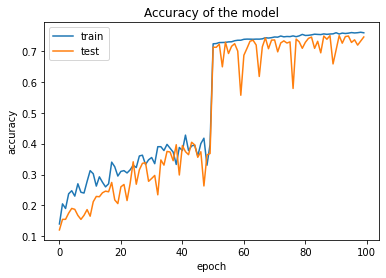

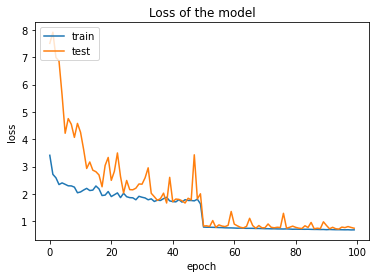

In [48]:
tot_val_acc = results2.history['val_acc'] + results3.history['val_acc'] + results4.history['val_acc']
tot_val_loss = results2.history['val_loss'] + results3.history['val_loss'] + results4.history['val_loss']
tot_acc = results2.history['acc'] + results3.history['acc'] + results4.history['acc']
tot_loss = results2.history['loss'] + results3.history['loss'] + results4.history['loss']

# results.history.keys()
plt.plot(tot_acc)
plt.plot(tot_val_acc)
plt.title('Accuracy of the model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(tot_loss)
plt.plot(tot_val_loss)
plt.title('Loss of the model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As you can see, AlexNet does not work very well on such a small dataset. Recall what you have learned from this class to improve its performance. You can also take a look at the [Dropout technique](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) and its [implementation in Keras](https://keras.io/layers/core/#dropout). 

#### Concusion:
IMPORTANT: Unexpected spikes we can see after each new run of the model.
As we can see from plots above, the tendency of the accuracy is to go up and the tend that loss follows is to go down for the training and for the validation set equally.
In this model we do not everfit, however during the last epochs we can observe a stable situation with the loss and accuracy, so we know - we should not keep the model training because it would lead to overfit.
### The best score:

The best result is: `loss: 0.6872 - acc: 0.7587 - val_loss: 0.7465 - val_acc: 0.7451`.

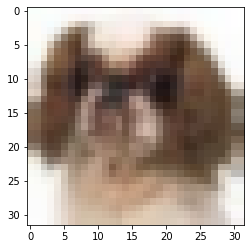

TRUE: This is dog


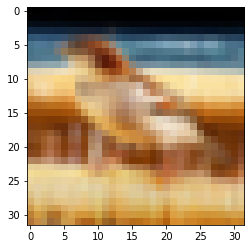

WRONG: This is horse , when it is:  bird


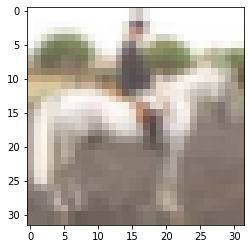

TRUE: This is horse


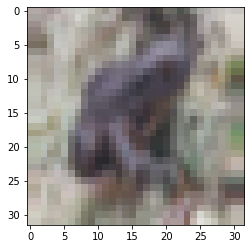

TRUE: This is frog


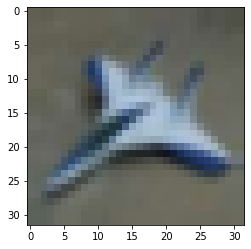

TRUE: This is plane


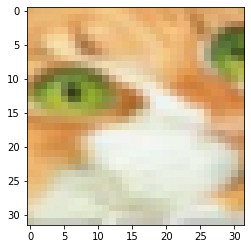

TRUE: This is cat


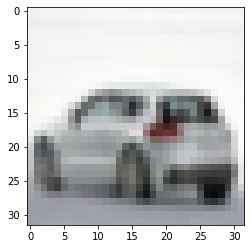

TRUE: This is car


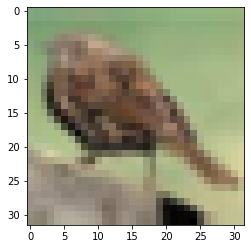

TRUE: This is bird


In [140]:
cv_images_, cv_labels_  = next(iter(val_generator.flow(cv_images, cv_labels, batch_size=batch_size)))

prediction_values = AlexNetLoaded2.predict_classes(cv_images_)

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    img = (cv_images_[i]).astype(int)
    show_image(img)
    plt.show()
#     print(prediction_values[i], ' : ', np.argmax(cv_labels_[i]))
  
    if prediction_values[i] == np.argmax(cv_labels_[i]):
        print('TRUE: This is', class_names[np.argmax(cv_labels_[i])])
    else:
        print('WRONG: This is', class_names[prediction_values[i]], ', when it is: ', class_names[np.argmax(cv_labels_[i])])
        